In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display
!pip install mglearn
import mglearn

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from pandas import read_csv, DataFrame, Series

In [3]:
data = read_csv('train.csv')

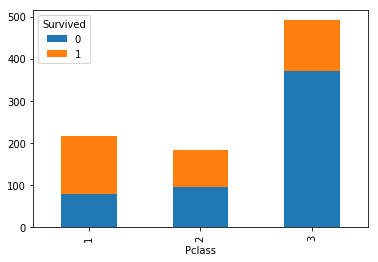

In [4]:
data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind="bar", stacked=True)

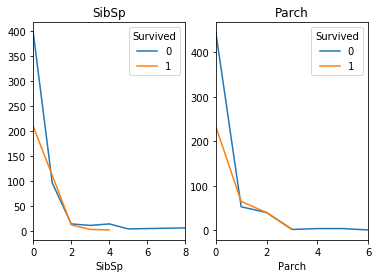

In [5]:
fig, axes = plt.subplots(ncols=2)
data.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')


In [6]:
print("Cabin not filled datas count: {}".format(data.PassengerId[data.Cabin.isnull()].count()))
print("Cabin filled datas count: {}".format(data.PassengerId[data.Cabin.notnull()].count()))


Cabin not filled datas count: 687
Cabin filled datas count: 204


In [8]:
print("Samples with not filed 'age' field: {}".format(data.PassengerId[data.Age.isnull()].count()))
print("Samples with filed 'age' filed: {}".format(data.PassengerId[data.Age.notnull()].count()))
print("Median field 'age': {}".format(data.Age.median()))

Samples with not filed 'age' field: 177
Samples with filed 'age' filed: 714
Median field 'age': 28.0


In [9]:
data.Age = data.Age.median()

In [10]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,28.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,28.0,0,0,113572,80.0,B28,NaN


In [11]:
MaxPassEmbarked = data.groupby('Embarked').count()['PassengerId']
data.Embarked[data.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
data.PassengerId[data.Fare.isnull()]

Series([], Name: PassengerId, dtype: int64)

In [13]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [14]:
print(data[:10])

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  28.0      1      0   7.2500        S
1         1       1  female  28.0      1      0  71.2833        C
2         1       3  female  28.0      0      0   7.9250        S
3         1       1  female  28.0      1      0  53.1000        S
4         0       3    male  28.0      0      0   8.0500        S
5         0       3    male  28.0      0      0   8.4583        Q
6         0       1    male  28.0      0      0  51.8625        S
7         0       3    male  28.0      3      1  21.0750        S
8         1       3  female  28.0      0      2  11.1333        S
9         1       2  female  28.0      1      0  30.0708        C


In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(data.Sex.drop_duplicates())
dicts['Sex'] = list(label.classes_)
data.Sex = label.transform(data.Sex)

label.fit(data.Embarked.drop_duplicates())
dicts['Embarked'] = list(label.classes_)
data.Embarked = label.transform(data.Embarked)

In [16]:
print(dicts)

{'Sex': ['female', 'male'], 'Embarked': ['C', 'Q', 'S']}


In [17]:
print(data[:10])

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  28.0      1      0   7.2500         2
1         1       1    0  28.0      1      0  71.2833         0
2         1       3    0  28.0      0      0   7.9250         2
3         1       1    0  28.0      1      0  53.1000         2
4         0       3    1  28.0      0      0   8.0500         2
5         0       3    1  28.0      0      0   8.4583         1
6         0       1    1  28.0      0      0  51.8625         2
7         0       3    1  28.0      3      1  21.0750         2
8         1       3    0  28.0      0      2  11.1333         2
9         1       2    0  28.0      1      0  30.0708         0


In [18]:
test = read_csv('test.csv')
print(test[:10])

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1

In [19]:
test = read_csv('test.csv')
test.Age[test.Age.isnull()] = test.Age.mean()
test.Fare[test.Fare.isnull()] = test.Fare.median() 


MaxPassEmbarked = test.groupby('Embarked').count()['PassengerId']
test.Embarked[test.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]
result = DataFrame(test.PassengerId)
test = test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

label.fit(test.Sex.drop_duplicates())
test.Sex = label.transform(test.Sex)

label.fit(test.Embarked.drop_duplicates())
test.Embarked = label.transform(test.Embarked)


print(dicts)

{'Sex': ['female', 'male'], 'Embarked': ['C', 'Q', 'S']}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [20]:
print(test[:5])

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         1
1       3    0  47.0      1      0   7.0000         2
2       2    1  62.0      0      0   9.6875         1
3       3    1  27.0      0      0   8.6625         2
4       3    0  22.0      1      1  12.2875         2


In [21]:
target = data.Survived
train = data.drop(['Survived'], axis=1) #из исходных данных убираем Id пассажира и флаг спасся он или нет
kfold = 5 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов

In [23]:
print(train[:10])

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  28.0      1      0   7.2500         2
1       1    0  28.0      1      0  71.2833         0
2       3    0  28.0      0      0   7.9250         2
3       1    0  28.0      1      0  53.1000         2
4       3    1  28.0      0      0   8.0500         2
5       3    1  28.0      0      0   8.4583         1
6       1    1  28.0      0      0  51.8625         2
7       3    1  28.0      3      1  21.0750         2
8       3    0  28.0      0      2  11.1333         2
9       2    0  28.0      1      0  30.0708         0


In [26]:
from sklearn import cross_validation
ROCtrainTRN, ROCtestTRN, ROCtrainTRG, ROCtestTRG = cross_validation.train_test_split(train, target, test_size=0.25)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm


model_rfc = RandomForestClassifier(n_estimators = 70) #в параметре передаем кол-во деревьев
model_knc = KNeighborsClassifier(n_neighbors = 18) #в параметре передаем кол-во соседей
model_lr = LogisticRegression(penalty='l1', tol=0.01) 
model_svc = svm.SVC()

In [39]:
scores = cross_validation.cross_val_score(model_rfc, train, target, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()
scores = cross_validation.cross_val_score(model_knc, train, target, cv = kfold)
itog_val['KNeighborsClassifier'] = scores.mean()
scores = cross_validation.cross_val_score(model_lr, train, target, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()
scores = cross_validation.cross_val_score(model_svc, train, target, cv = kfold)
itog_val['SVC'] = scores.mean()

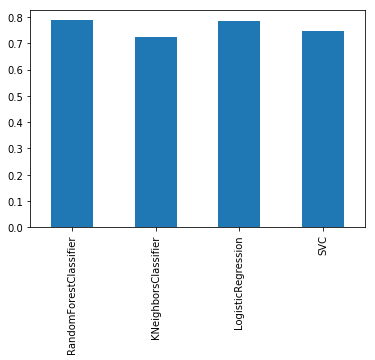

In [40]:
DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

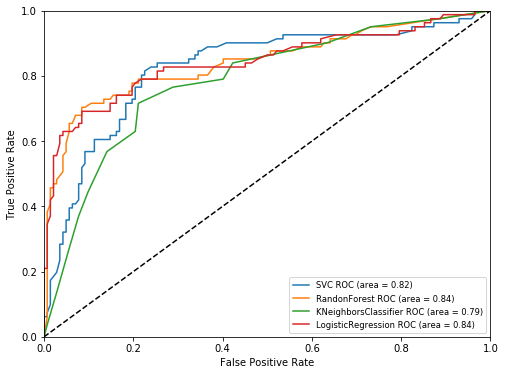

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as pl

pl.clf()
plt.figure(figsize=(8,6))
#SVC
model_svc.probability = True
probas = model_svc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('SVC', roc_auc))
#RandomForestClassifier
probas = model_rfc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))
#KNeighborsClassifier
probas = model_knc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))
#LogisticRegression
probas = model_lr.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

In [46]:
model_rfc.fit(train, target)
result.insert(1,'Survived', model_rfc.predict(test))
result.to_csv('test.csv', index=False)